In [10]:
import pandas as pd 
import matplotlib.pyplot as plt


data_type = {"CustomerID": str}
df = pd.read_excel('Online Retail.xlsx', dtype = data_type)


In [11]:
#Data preprocessing

selected_variables = ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country']

df_selected = df[selected_variables]

# Create aggregated variable (Amount)
df_selected['Total_Amount_Spent'] = df_selected['Quantity'] * df_selected['UnitPrice']

# Separate InvoiceDate into Date and Time
df_selected['Date'] = df_selected['InvoiceDate'].dt.date
df_selected['Time'] = df_selected['InvoiceDate'].dt.time

# Filter out rows without values in all variables 
df_selected = df_selected.dropna()

df_selected.head()


InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice CustomerID         Country  \
0 2010-12-01 08:26:00       2.55      17850  United Kingdom   
1 2010-12-01 08:26:00       3.39      17850  United Kingdom   
2 2010-12-01 08:26:00       2.75      17850  United Kingdom   
3 2010-12-01 08:26:00       3.39      17850  United Kingdom   
4 2010-12-01 08:26:00       3.39      17850  United Kingdom   

   Total_Amount_Spent        Date      Time  
0               15.30  2010-12-01  08:26:00  
1               20.34  2010-12-01  08:26:00  
2               22.00  2010-12-01  08:26:00  
3               20.34  2010-12-01  08:26:00  
4               20.34  2010-12-01  08:26:00

In [23]:
#compare RFM variables to 2012-01-01 
today_date = pd.to_datetime("2012-01-01")

print(df_selected.dtypes)

# Group by CustomerID and aggregate Recency, Frequency, Monetary, and Mean_Price
rfm_dataset = df_selected.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (today_date - x.max()).days,  # Calculate Recency
    'Quantity': 'count',  # Calculate Frequency
    'Total_Amount_Spent': 'sum',  # Calculate Monetary

})

# Rename the columns for clarity
rfm_dataset.rename(columns={
    "InvoiceDate": "Recency",
    "Quantity": "Frequency",
    "Total_Amount_Spent": "Monetary",
    }, inplace=True
)

# Filter rows with Monetary variable value not equal to 0
rfm_dataset = rfm_dataset[rfm_dataset['Monetary'] != 0]

# Display the result
rfm_dataset.head()

InvoiceNo                     object
StockCode                     object
Description                   object
Quantity                       int64
InvoiceDate           datetime64[ns]
UnitPrice                    float64
CustomerID                    object
Country                       object
Total_Amount_Spent           float64
Date                          object
Time                          object
dtype: object


Recency  Frequency  Monetary
CustomerID                              
12347            24        182   4310.00
12348            97         31   1797.24
12349            40         73   1757.55
12350           332         17    334.40
12352            58         95   1545.41

           Country  Total_Amount_Spent
35  United Kingdom         6767873.394
23     Netherlands          284661.540
10            EIRE          250285.220
14         Germany          221698.210
13          France          196712.840


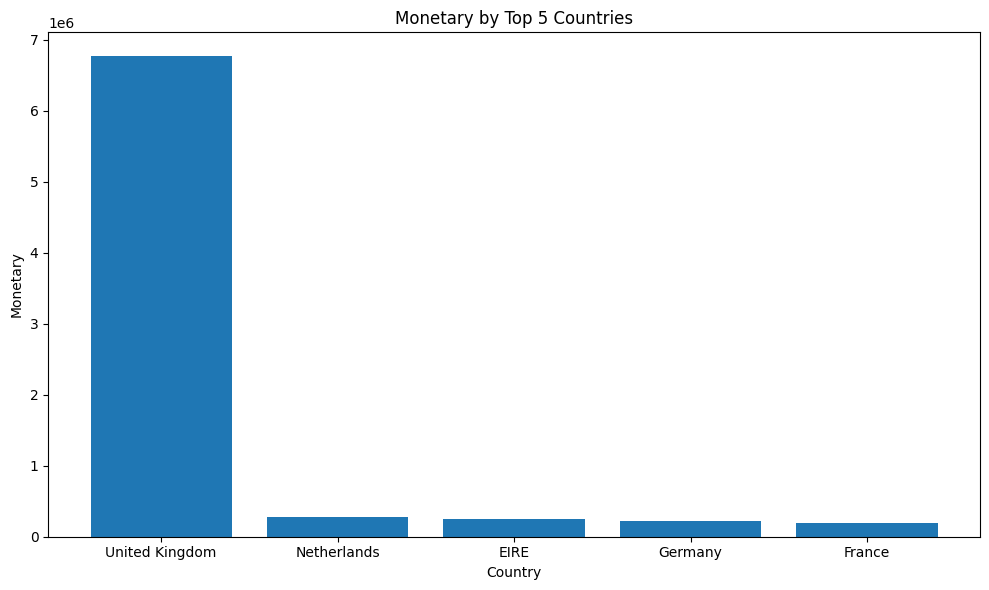

In [13]:
Monetary_Country = df_selected[['Country', 'Total_Amount_Spent']]

Monetary_Country= Monetary_Country.groupby('Country')['Total_Amount_Spent'].sum().reset_index()

Monetary_Country = Monetary_Country.sort_values(by='Total_Amount_Spent', ascending=False)

Monetary_Country = Monetary_Country.head(5)

print(Monetary_Country)

# Plot the graph
plt.figure(figsize=(10, 6))
plt.bar(Monetary_Country['Country'], Monetary_Country['Total_Amount_Spent'])
plt.xlabel('Country')
plt.ylabel('Monetary')
plt.title('Monetary by Top 5 Countries')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


                             Description  Quantity
3805   WORLD WAR 2 GLIDERS ASSTD DESIGNS     53215
1771             JUMBO BAG RED RETROSPOT     45066
217        ASSORTED COLOUR BIRD ORNAMENT     35314
3716  WHITE HANGING HEART T-LIGHT HOLDER     34147
2279     PACK OF 72 RETROSPOT CAKE CASES     33409
2612                      POPCORN HOLDER     30504
2669                  RABBIT NIGHT LIGHT     27094
2057             MINI PAINT SET VINTAGE      25880
2245          PACK OF 12 LONDON TISSUES      25321
2277  PACK OF 60 PINK PAISLEY CAKE CASES     24163


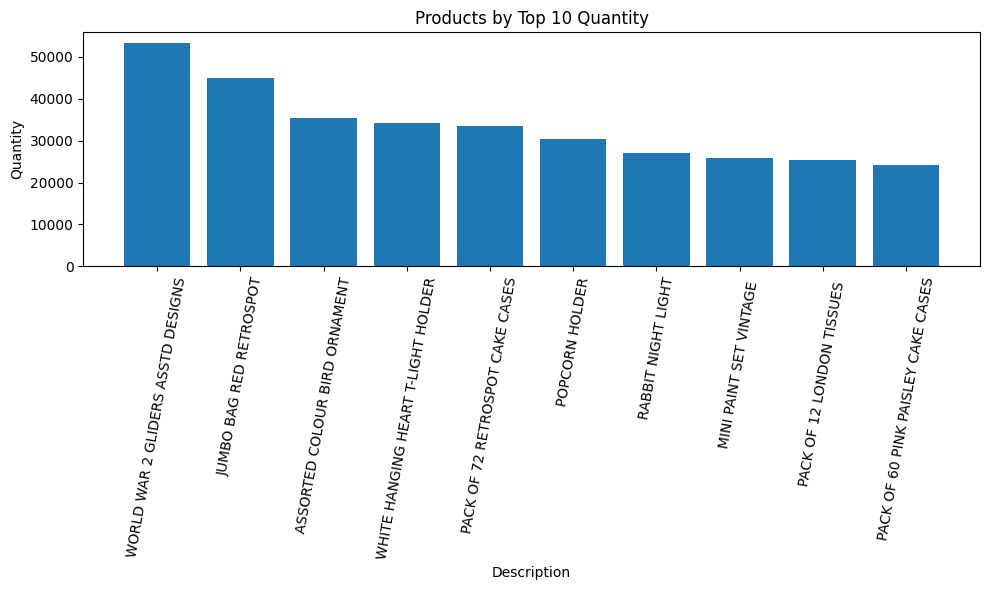

In [14]:
#most popular product 
Quantity_Product = df_selected[["Description", 'Quantity']]

Quantity_Product = Quantity_Product.groupby('Description')['Quantity'].sum().reset_index()

Quantity_Product = Quantity_Product.sort_values(by='Quantity', ascending=False)

Quantity_Product = Quantity_Product.head(10)

print(Quantity_Product)

# Plot the graph
plt.figure(figsize=(10, 6))
plt.bar(Quantity_Product['Description'], Quantity_Product['Quantity'])
plt.xlabel('Description')
plt.ylabel('Quantity')
plt.title('Products by Top 10 Quantity')
plt.xticks(rotation=80)
plt.tight_layout()
plt.show()



In [15]:
# Select relevant columns
Monetary_Product = df_selected[["Description", "Quantity","UnitPrice", "Total_Amount_Spent"]]

Monetary_Product = df_selected.groupby('Description').agg({
    'Total_Amount_Spent': 'sum',
    'Quantity': 'sum',  # Optional: Also sum the quantity for reference
}).reset_index()

# Sort by Total_Amount_Spent in descending order
Monetary_Product = Monetary_Product.sort_values(by='Total_Amount_Spent', ascending=False)

# Select the top 10 most profitable products
Monetary_Product = Monetary_Product.head(10)


# Print the top 10 most profitable products
print(Monetary_Product)

# Plot the graph
# plt.figure(figsize=(10, 6))
# plt.bar(Monetary_Product['Description'], Monetary_Product['Total_Amount_Spent'])
# plt.xlabel('Description')
# plt.ylabel('Monetary_Product')
# plt.title('Products by Top 10 Monetary')
# plt.xticks(rotation=80)
# plt.tight_layout()
# plt.show()



                             Description  Total_Amount_Spent  Quantity
2780            REGENCY CAKESTAND 3 TIER           132870.40     11555
3716  WHITE HANGING HEART T-LIGHT HOLDER            93823.85     34147
1771             JUMBO BAG RED RETROSPOT            83236.76     45066
2355                       PARTY BUNTING            67687.53     15027
2624                             POSTAGE            66710.24      3002
217        ASSORTED COLOUR BIRD ORNAMENT            56499.22     35314
2669                  RABBIT NIGHT LIGHT            51137.80     27094
725                        CHILLI LIGHTS            45936.81      9570
2323     PAPER CHAIN KIT 50'S CHRISTMAS             41500.48     15164
2405      PICNIC BASKET WICKER 60 PIECES            39619.50        61


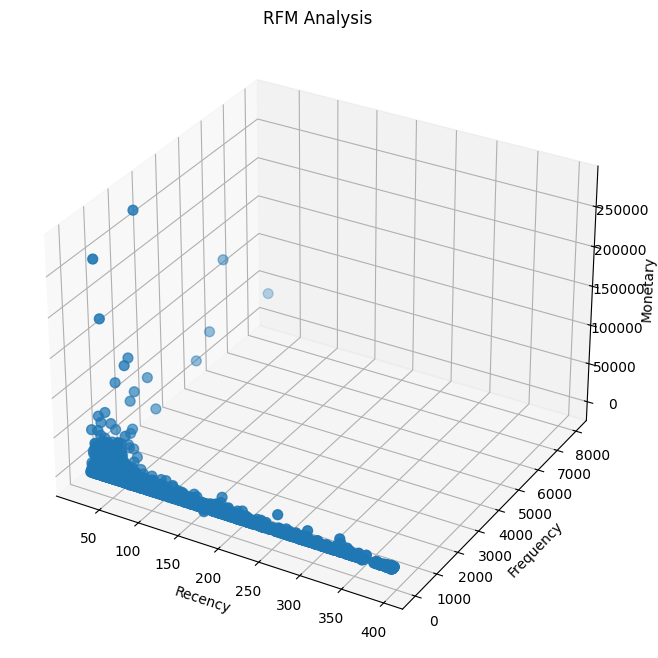

 Recency  Frequency  Monetary
      23       2085 279489.02
      22        433 256438.49
      30        351 187482.17
      23       5903 132572.62
      46        778 123725.45
      31       1420 113384.14
      24       1076  88125.38
      26        281  65892.08
      25        585  62653.10
      22       2491  59419.34
      24       1857  57385.88
      26       5128  57120.91
      25        410  54228.74
      23         79  52750.84
      29        147  51823.72
      60        274  50992.61
      25       1640  50862.44
      32        590  50415.49
      23       7983  40340.78
      23        439  36351.42
      39        399  33805.69
      43        102  33462.81
      25        151  33366.25
      33        169  33350.76
      22        224  31300.08
      26        201  30300.82
      22       4642  29072.10
      23        605  28658.88
      23       1061  27964.48
      23        501  27487.41
      47        320  26932.34
      25         56  26763.34
      29  

In [26]:
from mpl_toolkits.mplot3d import Axes3D

# Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(rfm_dataset['Recency'], rfm_dataset['Frequency'], rfm_dataset['Monetary'], s=50)

# Set labels and title
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('RFM Analysis')

# Show plot
plt.show()




In [36]:
# Define functions to categorize customers based on each variable and assign scores
def categorize_recency(recency):
    if recency <= rfm_dataset['Recency'].quantile(0.2):
        return 5
    elif recency <= rfm_dataset['Recency'].quantile(0.4):
        return 4
    elif recency <= rfm_dataset['Recency'].quantile(0.6):
        return 3
    elif recency <= rfm_dataset['Recency'].quantile(0.8):
        return 2
    else:
        return 1

def categorize_frequency(frequency):
    if frequency <= rfm_dataset['Frequency'].quantile(0.2):
        return 1
    elif frequency <= rfm_dataset['Frequency'].quantile(0.4):
        return 2
    elif frequency <= rfm_dataset['Frequency'].quantile(0.6):
        return 3
    elif frequency <= rfm_dataset['Frequency'].quantile(0.8):
        return 4
    else:
        return 5

def categorize_monetary(monetary):
    if monetary <= rfm_dataset['Monetary'].quantile(0.2):
        return 1
    elif monetary <= rfm_dataset['Monetary'].quantile(0.4):
        return 2
    elif monetary <= rfm_dataset['Monetary'].quantile(0.6):
        return 3
    elif monetary <= rfm_dataset['Monetary'].quantile(0.8):
        return 4
    else:
        return 5

# Apply categorization functions to each variable and assign scores
rfm_dataset['Recency_Score'] = rfm_dataset['Recency'].apply(categorize_recency)
rfm_dataset['Frequency_Score'] = rfm_dataset['Frequency'].apply(categorize_frequency)
rfm_dataset['Monetary_Score'] = rfm_dataset['Monetary'].apply(categorize_monetary)

# Add up the scores for each customer
rfm_dataset['Total_Score'] = rfm_dataset['Recency_Score'] + rfm_dataset['Frequency_Score'] + rfm_dataset['Monetary_Score']

# Print the result
print(rfm_dataset.head())


            Recency  Frequency  Monetary  Recency_Score  Frequency_Score  \
CustomerID                                                                 
12347            24        182   4310.00              5                5   
12348            97         31   1797.24              2                3   
12349            40         73   1757.55              4                4   
12350           332         17    334.40              1                2   
12352            58         95   1545.41              3                4   

            Monetary_Score  Total_Score  Cluster  
CustomerID                                        
12347                    5           15        0  
12348                    4            9        0  
12349                    4           12        0  
12350                    2            5        0  
12352                    4           11        0  


In [41]:
# Filter customers with high scores on two different variables but low on one variable
high_score_low_variable_customers = rfm_dataset[((rfm_dataset['Recency_Score'] >= 4) & (rfm_dataset['Frequency_Score'] >= 4) & (rfm_dataset['Monetary_Score'] <= 2)) |
                                                ((rfm_dataset['Recency_Score'] >= 4) & (rfm_dataset['Monetary_Score'] >= 4) & (rfm_dataset['Frequency_Score'] <= 2)) |
                                                ((rfm_dataset['Frequency_Score'] >= 4) & (rfm_dataset['Monetary_Score'] >= 4) & (rfm_dataset['Recency_Score'] <= 2))]

# Print the result
print(high_score_low_variable_customers)

# Count the number of customers included
num_customers = high_score_low_variable_customers.shape[0]

# Print the result
print("Number of customers included:", num_customers)



            Recency  Frequency  Monetary  Recency_Score  Frequency_Score  \
CustomerID                                                                 
12358            23         19   1168.06              5                2   
12377           337         77   1628.12              1                4   
12378           151        219   4008.62              2                5   
12383           206        100   1839.31              1                4   
12391            43        100    460.89              4                4   
...             ...        ...       ...            ...              ...   
18202           221         68   1396.99              1                4   
18231           214        126   2066.17              1                5   
18239           240         88   1561.61              1                4   
18242            94         78   2232.49              2                4   
18260           194        140   2595.00              2                5   

           